<a href="https://colab.research.google.com/github/RafaelAnga/Bootcamp_AI_BIT/blob/main/RDG_mpg_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing RDG in MPG data


## Step 1: Import Necessary Libraries

In [ ]:
import pandas as pd  # Para el manejo de los datos
import numpy as np # Para el manejo de operaciones entre datos, y las columnas
import matplotlib.pyplot as plt # Para el manejo de las graficas
import seaborn as sns # Para el manejo de graficas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tools.tools import add_constant # Helps to use the add_constant library
from sklearn.metrics import r2_score # Helps to use the r2_score library

In [ ]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os    # la librería necesaria para la ruta de la carpeta
os.chdir('/content/drive/MyDrive/Bootcamp AI/DataSetClean')

#mostar lista de archivos
os.listdir()

['marketing_extract_2X_Income.xlsx', 'mpg_clean.xlsx']

## Step 2: Load and Explore the Dataset

In [ ]:
df = pd.read_excel('mpg_clean.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg:           392 non-null    float64
 1   cylinders:     392 non-null    int64  
 2   displacement:  392 non-null    int64  
 3   horsepower:    392 non-null    int64  
 4   weight:        392 non-null    int64  
 5   acceleration:  392 non-null    float64
 6   model year:    392 non-null    int64  
 7   origin:        392 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 24.6 KB


In [ ]:
#Used to correlate the data between two variables
corr = df.corr()
corr

,mpg:,cylinders:,displacement:,horsepower:,weight:,acceleration:,model year:,origin:
mpg:,1.000000,-0.777618,0.403603,-0.778427,-0.832244,0.197394,0.580541,0.565209
cylinders:,-0.777618,1.000000,-0.244234,0.842983,0.897527,-0.219817,-0.345647,-0.568932
displacement:,0.403603,-0.244234,1.000000,-0.287269,-0.387780,0.102016,0.004126,0.361652
horsepower:,-0.778427,0.842983,-0.287269,1.000000,0.864538,-0.244505,-0.416361,-0.455171
weight:,-0.832244,0.897527,-0.387780,0.864538,1.000000,-0.167748,-0.309120,-0.585005
acceleration:,0.197394,-0.219817,0.102016,-0.244505,-0.167748,1.000000,0.128415,0.088569
model year:,0.580541,-0.345647,0.004126,-0.416361,-0.309120,0.128415,1.000000,0.181528
origin:,0.565209,-0.568932,0.361652,-0.455171,-0.585005,0.088569,0.181528,1.000000


<Axes: >

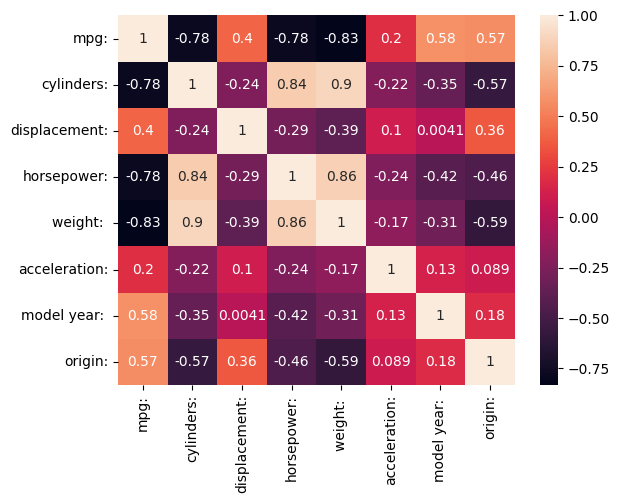

In [ ]:
#Heat map for correlation
sns.heatmap(corr, annot=True)

## Step 3: Define Cost Function and Gradient Descendent

In [ ]:

m = len(df)
def cost_function(H,Y):
  #MSE = np.mean((h-Y)**2)
  # np.mean : calcula media aritmética de los elemntos
  cost = np.mean((H-Y)**2)
  return cost

In [ ]:
# Initialize parameters for the Gradient Descent model
def my_RGD(Y,X1,alpha,n_iterations):
  # Randomly initialize the parameter vector theta (column vector with two parameters)
  # theta_0 (intercept) and theta_1 (coefficient)
  theta = np.random.randn(2,1)

   # Add a column of 1's to X1 to represent the intercept term (bias)
    # This ensures the correct matrix multiplication with the parameter vector theta
  X1 = add_constant(X1)

 # Convert Y into a column vector with shape (m, 1), where m is the number of samples
  Y = np.reshape(Y,(-1,1))

  # Initialize an array to store the cost at each iteration
  cost_history = np.zeros(n_iterations)

  # Gradient Descent loop: iterate n_iteraciones times
  for i in range(n_iterations):
    # Compute the hypothesis H = X1 * theta (dot product)
    # This gives the predicted values for the current parameters
    H = np.dot(X1,theta)

    # Calculate the cost using the cost function (e.g., Mean Squared Error)
    cost = cost_function(H,Y)

    # Store the cost for the current iteration in the cost history array
    cost_history[i] = cost_function(H,Y)

    # Update the parameters using Gradient Descent formula:
    # theta = theta - alpha * (2/m) * (X1^T * (H - Y))
    # alpha is the learning rate, controlling the step size
    # (H - Y) gives the error for each prediction
    theta = theta - alpha * (2/m) * np.dot(X1.T,(H-Y))

  # Return the final parameters and the cost history
  return theta, cost_history


# Activity 4: Initialize Parameters and Run

[[ 0.35768691]
 [-1.08284541]]


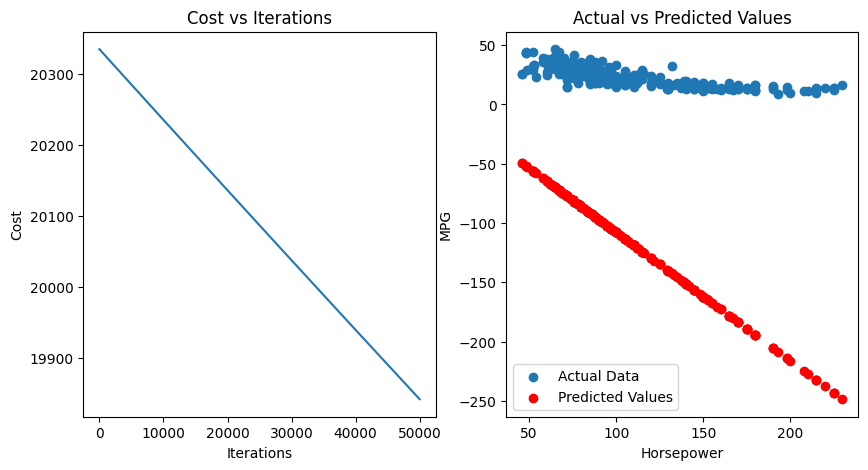

In [ ]:
# DataSet and Parameters

# Define the target variable (Y) – what we want to predict
Y = df['mpg:']

# Define the feature (X1) – the input used for prediction
X1 = df['horsepower:']

# Hyperparameters: learning rate and number of iterations
alpha = 1e-11  # Very small learning rate to ensure stable convergence
n_iterations = 50000  # Number of iterations for Gradient Descent



# Run Gradient Descent to get the final parameters and cost history
theta_final, cost_history = my_RGD(Y, X1, alpha, n_iterations)

# Prediction using the final parameters (hypothesis function)
H_final = theta_final[0] + theta_final[1] * X1

# Print the final parameters
print(theta_final)

# Plot the cost function vs. number of iterations to visualize convergence
plt.figure(figsize=(10, 5))  # Create a figure with a size of 10x5 inches

# Subplot 1: Plotting the cost function history
plt.subplot(1, 2, 1)  # Create a 1x2 grid, plot on the first subplot
plt.plot(cost_history)  # Plot the cost over iterations
plt.title('Cost vs Iterations')  # Set the title of the plot
plt.xlabel('Iterations')  # Label for the x-axis
plt.ylabel('Cost')  # Label for the y-axis

# Subplot 2: Plotting actual vs predicted values
plt.subplot(1, 2, 2)  # Plot on the second subplot
plt.scatter(df['horsepower:'], df['mpg:'], label='Actual Data')  # Plot actual data points
plt.scatter(df['horsepower:'], H_final, color='red', label='Predicted Values')  # Plot predicted values
plt.legend()  # Display the legend to differentiate actual vs predicted
plt.xlabel('Horsepower')  # Label for the x-axis
plt.ylabel('MPG')  # Label for the y-axis
plt.title('Actual vs Predicted Values')  # Set the title for the plot

# Show the complete plot with both subplots
plt.show()

# Linear model using Horsepower as a basis



In [ ]:
#Prepare the data that will be used to make our model
Y = df['mpg:']
X1 = df[['horsepower:']]

#Split the data into trainig data and test data
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

In [ ]:
# Creates and trains a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Prints the x values which trained the data
X_train

,horsepower:
258,110
182,92
172,97
63,150
340,64
...,...
71,150
106,100
270,85
348,65


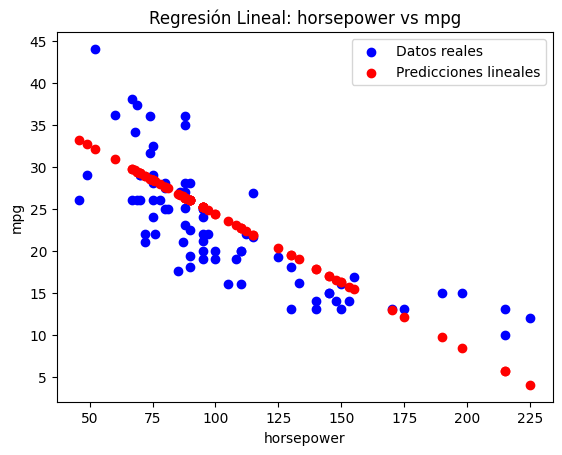

In [ ]:
# Predicts the mpg for the test set
y_pred = linear_model.predict(X_test)

# Visualizes results of the model
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones lineales')
plt.title('Regresión Lineal: horsepower vs mpg')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.legend()
plt.show()

In [ ]:
# Calculating the R^2 score for the Linear model
r2_linear = r2_score(y_test, y_pred)

# Printing the R^2 score
print(f'R^2 Score (Linear Model): {r2_linear:.4f}')

R^2 Score (Linear Model): 0.5660


In [ ]:
# Predict mpg for user input
option = int(input("Ingrese el horsepower: "))
predicted_class = linear_model.predict([[option]])

print(f"The expected mpg for a vehicle with {option} horsepower is: {predicted_class[0]:.2f} mpg")


Ingrese el horsepower: 12
The expected mpg for a vehicle with 12 horsepower is: 38.65 mpg


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Polynomial model 1

*   Using Horsepower as a characterstic and having mpg as a target

In [ ]:
#Extracting the target variable (mpg) and the feature (horsepower)
Y = df['mpg:']
X1 = df[['horsepower:']]

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

In [ ]:
# Creating polynomial features of degree 2 (for quadratic regression)
poly = PolynomialFeatures(degree=2)

# Transforming the training data to include polynomial features
X_train_poly = poly.fit_transform(X_train)

#Prints the x values which trained the data
X_train_poly

In [ ]:
# Transforming the test data using the same polynomial transformation
X_test_poly = poly.transform(X_test)

In [ ]:
# Initializing and training the linear regression model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

In [ ]:
# Predicting mpg values on the test set
y_pred_poly = poly_model.predict(X_test_poly)


# Visualizing the results with a scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_poly, color='red', label='Polynomial Predictions')
plt.title('Polynomial Regression: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

In [ ]:
# Retrieve the parameters of the polynomial model
# This returns a dictionary of all the model parameters (e.g., fit_intercept, normalize)
poly_model.get_params()



In [ ]:
# Calculating the R^2 score for the polynomial model
r2 = r2_score(y_test, y_pred_poly)

# Printing the R^2 score
print(f'R^2 Score: {r2:.4f}')

R^2 Score: 0.7393


In [ ]:
# Taking user input for horsepower and predicting the corresponding MPG
option = int(input("Enter the horsepower of the vehicle: "))  # Prompt user to enter a horsepower value

# Define a helper function to format the input with polynomial features (degree 2)
def fix(option):
    return [1, option, option**2]  # Include intercept (1), horsepower, and horsepower^2

# Prepare the input for prediction
x_test = fix(option)  # Transform the user input to match the polynomial model format

# Predict the MPG using the trained polynomial model
predicted_class = poly_model.predict([x_test])  # Pass the input as a 2D array for prediction

# Display the predicted MPG value, rounded to 2 decimal places
print(f"The expected mpg for a vehicle with {option} horsepower is: {predicted_class[0]:.2f} mpg")



# Polynomial model 2

*   Using Weight as a characterstic while having mpg as a target

In [ ]:
#Extracting the target variable (mpg) and the feature (horsepower)
Y = df['mpg:']
X1 = df[['weight: ']]

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

In [ ]:
# Creating polynomial features of degree 2 (for quadratic regression)
poly = PolynomialFeatures(degree=2)

# Transforming the training data to include polynomial features
X_train_poly = poly.fit_transform(X_train)

#Prints the x values which trained the data
X_train_poly

array([[1.0000000e+00, 3.6200000e+03, 1.3104400e+07],
       [1.0000000e+00, 2.5720000e+03, 6.6151840e+06],
       [1.0000000e+00, 2.9840000e+03, 8.9042560e+06],
       [1.0000000e+00, 4.1350000e+03, 1.7098225e+07],
       [1.0000000e+00, 1.8750000e+03, 3.5156250e+06],
       [1.0000000e+00, 4.3250000e+03, 1.8705625e+07],
       [1.0000000e+00, 1.8450000e+03, 3.4040250e+06],
       [1.0000000e+00, 2.9450000e+03, 8.6730250e+06],
       [1.0000000e+00, 3.2450000e+03, 1.0530025e+07],
       [1.0000000e+00, 4.0600000e+03, 1.6483600e+07],
       [1.0000000e+00, 3.7810000e+03, 1.4295961e+07],
       [1.0000000e+00, 2.8900000e+03, 8.3521000e+06],
       [1.0000000e+00, 3.1600000e+03, 9.9856000e+06],
       [1.0000000e+00, 1.9850000e+03, 3.9402250e+06],
       [1.0000000e+00, 2.5750000e+03, 6.6306250e+06],
       [1.0000000e+00, 3.5350000e+03, 1.2496225e+07],
       [1.0000000e+00, 3.8200000e+03, 1.4592400e+07],
       [1.0000000e+00, 2.9330000e+03, 8.6024890e+06],
       [1.0000000e+00, 4.654

In [ ]:
# Transforming the test data using the same polynomial transformation
X_test_poly = poly.transform(X_test)

In [ ]:
# Initializing and training the linear regression model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

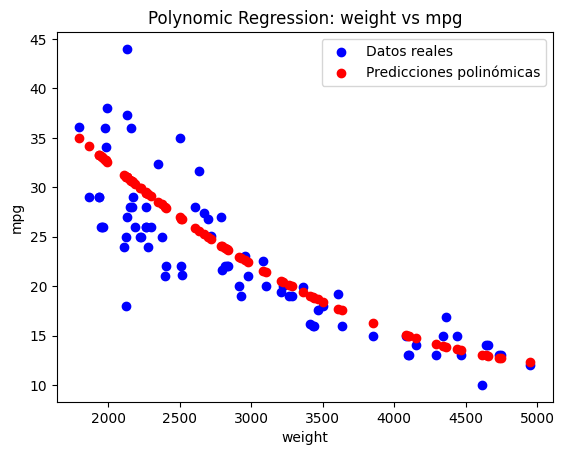

In [ ]:
# Predicting mpg values on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Visualizing the results with a scatter plot
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred_poly, color='red', label='Predicciones polinómicas')
plt.title('Polynomic Regression: weight vs mpg')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.legend()
plt.show()

In [ ]:
# Retrieve the parameters of the polynomial model
# This returns a dictionary of all the model parameters (e.g., fit_intercept, normalize)
poly_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
# Get the intercept (theta_0) of the trained model
# This is the constant term in the polynomial equation, representing the bias
poly_model.intercept_

63.738839659120316

In [ ]:
# Get the coefficients (theta_1, theta_2, ...) of the trained model
# These represent the weights for each feature in the polynomial equation
poly_model.coef_

array([ 0.00000000e+00, -1.91262275e-02,  1.76402947e-06])

In [ ]:
# Calculating the R^2 score for the polynomial model
r2 = r2_score(y_test, y_pred_poly)

# Printing the R^2 score
print(f'R^2 Score: {r2:.4f}')

R^2 Score: 0.6730


In [ ]:
# Taking user input for horsepower and predicting the corresponding MPG
option = int(input("Enter the weight of the vehicle: "))  # Prompt user to enter a horsepower value

# Define a helper function to format the input with polynomial features (degree 2)
def fix(option):
    return [1, option, option**2]  # Include intercept (1), horsepower, and horsepower^2

# Prepare the input for prediction
x_test = fix(option)  # Transform the user input to match the polynomial model format

# Predict the MPG using the trained polynomial model
predicted_class = poly_model.predict([x_test])  # Pass the input as a 2D array for prediction

# Display the predicted MPG value, rounded to 2 decimal places
print(f"The expected mpg for a vehicle with {option} of weight is: {predicted_class[0]:.2f} mpg")


Enter the weight of the vehicle: 4500
The expected mpg for a vehicle with 4500 of weight is: 13.39 mpg


# Polynomial model 3

*   Using cilinders as a characterstic while having horsepower as a target

In [ ]:
#Extracting the target variable (mpg) and the feature (horsepower)
Y = df['horsepower:']
X1 = df[['mpg:']]

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.2, random_state=42)

In [ ]:
# Creating polynomial features of degree 2 (for quadratic regression)
poly = PolynomialFeatures(degree=2)

# Transforming the training data to include polynomial features
X_train_poly = poly.fit_transform(X_train)

#Prints the x values which trained the data
X_train_poly

array([[1.00000e+00, 1.86000e+01, 3.45960e+02],
       [1.00000e+00, 2.50000e+01, 6.25000e+02],
       [1.00000e+00, 1.80000e+01, 3.24000e+02],
       [1.00000e+00, 1.50000e+01, 2.25000e+02],
       [1.00000e+00, 3.90000e+01, 1.52100e+03],
       [1.00000e+00, 1.55000e+01, 2.40250e+02],
       [1.00000e+00, 2.98000e+01, 8.88040e+02],
       [1.00000e+00, 2.50000e+01, 6.25000e+02],
       [1.00000e+00, 2.15000e+01, 4.62250e+02],
       [1.00000e+00, 1.70000e+01, 2.89000e+02],
       [1.00000e+00, 1.60000e+01, 2.56000e+02],
       [1.00000e+00, 2.23000e+01, 4.97290e+02],
       [1.00000e+00, 3.07000e+01, 9.42490e+02],
       [1.00000e+00, 3.00000e+01, 9.00000e+02],
       [1.00000e+00, 3.10000e+01, 9.61000e+02],
       [1.00000e+00, 1.92000e+01, 3.68640e+02],
       [1.00000e+00, 1.65000e+01, 2.72250e+02],
       [1.00000e+00, 1.80000e+01, 3.24000e+02],
       [1.00000e+00, 1.30000e+01, 1.69000e+02],
       [1.00000e+00, 2.75000e+01, 7.56250e+02],
       [1.00000e+00, 1.80000e+01, 3.2400

In [ ]:
# Transforming the test data using the same polynomial transformation
X_test_poly = poly.transform(X_test)

In [ ]:
# Initializing and training the linear regression model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

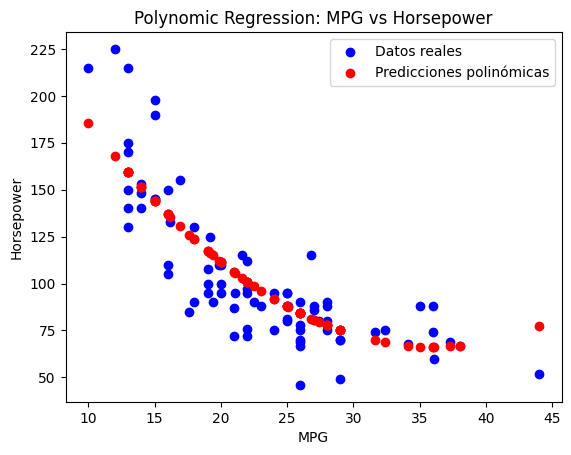

In [ ]:
# Predicting mpg values on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Visualizing the results with a scatter plot
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred_poly, color='red', label='Predicciones polinómicas')
plt.title('Polynomic Regression: MPG vs Horsepower')
plt.xlabel('MPG')
plt.ylabel('Horsepower')
plt.legend()
plt.show()

In [ ]:
# Calculating the R^2 score for the polynomial model
r2 = r2_score(y_test, y_pred_poly)

# Printing the R^2 score
print(f'R^2 Score: {r2:.4f}')

R^2 Score: 0.7393


In [ ]:
# Taking user input for horsepower and predicting the corresponding MPG
option = int(input("Enter the Miles per gallon of the vehicle: "))  # Prompt user to enter a MPG value

# Define a helper function to format the input with polynomial features (degree 2)
def fix(option):
    return [1, option, option**2]  # Include intercept (1), horsepower, and horsepower^2

# Prepare the input for prediction
x_test = fix(option)  # Transform the user input to match the polynomial model format

# Predict the MPG using the trained polynomial model
predicted_class = poly_model.predict([x_test])  # Pass the input as a 2D array for prediction

# Display the predicted MPG value, rounded to 2 decimal places
print(f"The expected horsepower for a vehicle with {option} mpg is: {predicted_class[0]:.2f} horsepower")

Enter the Miles per gallon of the vehicle: 18
The expected horsepower for a vehicle with 18 mpg is: 123.52 horsepower
